In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torch.nn.functional as F
import numpy as np
from tqdm import tqdm_notebook

import fannypack
from lib import dpf, panda_datasets, panda_baseline_models, panda_baseline_training


In [3]:
# Experiment configuration
experiment_name = "lstm_feb19"
dataset_args = {
    'use_proprioception': True,
    'use_haptics': True,
    'use_vision': True,
    'vision_interval': 2,
}

In [4]:
print("Creating model...")
model = panda_baseline_models.PandaLSTMModel(batch_size=16)
buddy = fannypack.utils.Buddy(experiment_name, model)

Creating model...
[buddy-lstm_feb19] Using device: cuda
[buddy-lstm_feb19] No checkpoint found


In [7]:
print("Creating dataset...")
dataset = panda_datasets.PandaSubsequenceDataset(
    'data/gentle_push_1000.hdf5',
    subsequence_length=16,
    **dataset_args)

Creating dataset...


In [9]:
# buddy.set_learning_rate(1e-4)
dataloader = torch.utils.data.DataLoader(
    dataset, batch_size=16, shuffle=True, num_workers=2, drop_last=True)
for _ in tqdm_notebook(range(10)):
    for batch_idx, batch in enumerate(tqdm_notebook(dataloader)):
        states, observations, _ = fannypack.utils.to_device(batch, buddy._device)

        model.reset_hidden_states(states[:, 0, :])
        predicted_states = model(observations)
        loss = F.mse_loss(predicted_states, states)
        buddy.minimize(loss, checkpoint_interval=500)
        buddy.log("loss", loss)

buddy.save_checkpoint()

[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000000500.ckpt
[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000001000.ckpt



[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000001500.ckpt
[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000002000.ckpt



[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000002500.ckpt
[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000003000.ckpt



[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000003500.ckpt



[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000004000.ckpt
[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000004500.ckpt



[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000005000.ckpt
[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000005500.ckpt



[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000006000.ckpt
[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000006500.ckpt



[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000007000.ckpt
[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000007500.ckpt



[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000008000.ckpt
[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000008500.ckpt



[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000009000.ckpt
[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000009500.ckpt


[buddy-lstm_feb19] Saved checkpoint to path: checkpoints/lstm_feb19-0000000000009603.ckpt


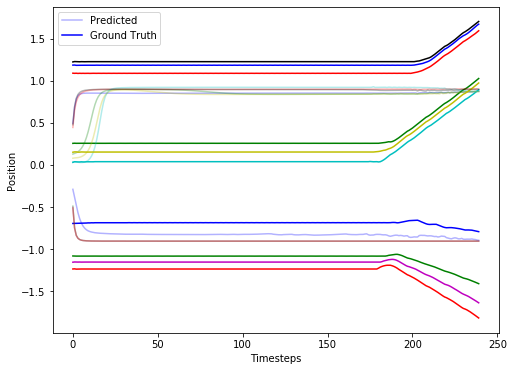

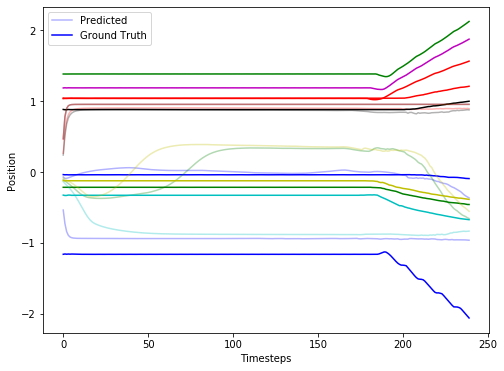

X RMSE:  0.44183721537785836
Y RMSE:  0.3484283374745961


In [12]:
eval_trajectories = panda_datasets.load_trajectories(("data/gentle_push_100.hdf5",10), **dataset_args)

pred, actual = panda_baseline_training.rollout_lstm(model, eval_trajectories)
panda_baseline_training.eval_rollout(pred, actual, plot=True)

In [ ]:
buddy.save_checkpoint("stable")

In [ ]:
buddy.save_checkpoint()